In [1]:
import cfusdlog
import matplotlib.pyplot as plt
import argparse
import numpy as np
import os


def plotxyz(t, list_array_xyz, list_label, ylim=None):
    for i in range(3):
        plt.figure(figsize=(10, 3))
        for j in range(len(list_array_xyz)):
            plt.plot(t, list_array_xyz[j][:, i], label=f'{list_label[j]}_{"xyz"[i]}')
            # plt.scatter(t, list_array_xyz[j][:, i], label=f'{list_label[j]}_{"xyz"[i]}')
        plt.legend()
        if ylim is not None:
            plt.ylim(ylim)
        plt.show()

def deg2rad(deg):
    return deg * np.pi / 180

def rad2deg(rad):
    return rad * 180 / np.pi

['cfctl_1116132701.txt', 'cfctl_1116195721.txt', 'att_pid_1111175841.txt', 'cfctl_1117194200.txt', 'cfctl_1117094520.txt', 'cfctl_1116204744.txt', 'att_pid_1115150019.txt', '2023-11-08_18-58-37_log_1107_2110', 'att_pid_1111184129.txt', 'att_pid_1112005026.txt', 'cfctl_1116213230.txt', 'att_pid_1112142130.txt', 'cfctl_1116151743.txt', '2023-11-08_18-58-37_log06', '2023-11-08_18-58-37_log13', '2023-11-12_15-42-46_log07', 'att_pid_1111235747.txt', 'cfctl_1116200126.txt', 'cfctl_1118150715.txt', 'att_pid_1111205529.txt', 'att_pid_1112161621.txt', 'cfctl_1118100815.txt', 'att_pid_1112211039.txt', '2023-11-12_15-22-41_log05', 'cfctl_1116131713.txt', 'cfctl_1117101604.txt', 'att_pid_1112160312.txt', '2023-11-08_18-58-37_log_1107_1742', 'cfctl_1117094724.txt', '2023-11-12_15-50-25_log00', 'cfctl_1118155152.txt', 'cfctl_1116203307.txt', 'att_pid_1111180125.txt', 'cfctl_1117201253.txt', 'cfctl_1116201422.txt', '2023-11-08_18-58-37_log_1107_2133', '2023-11-15_13-43-18_log00', 'cfctl_1116152713.tx

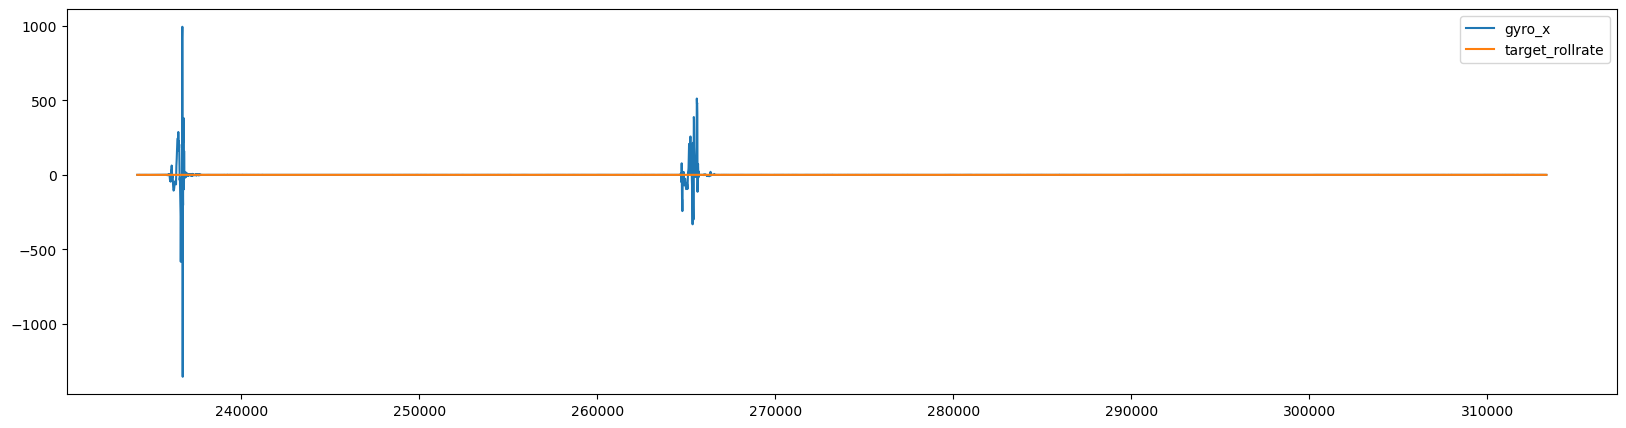

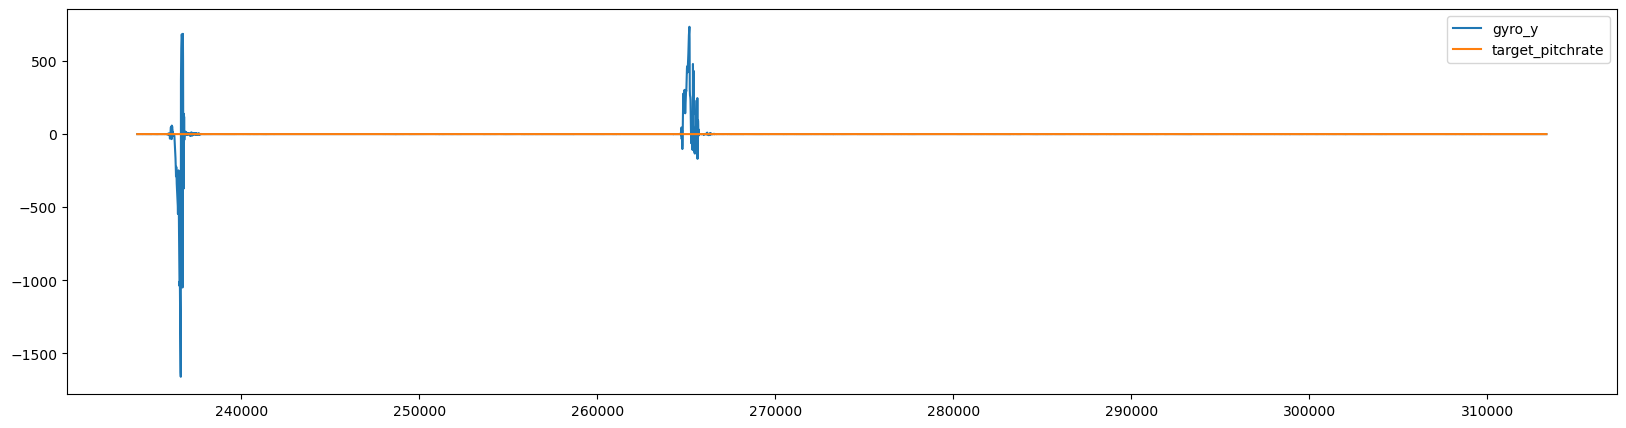

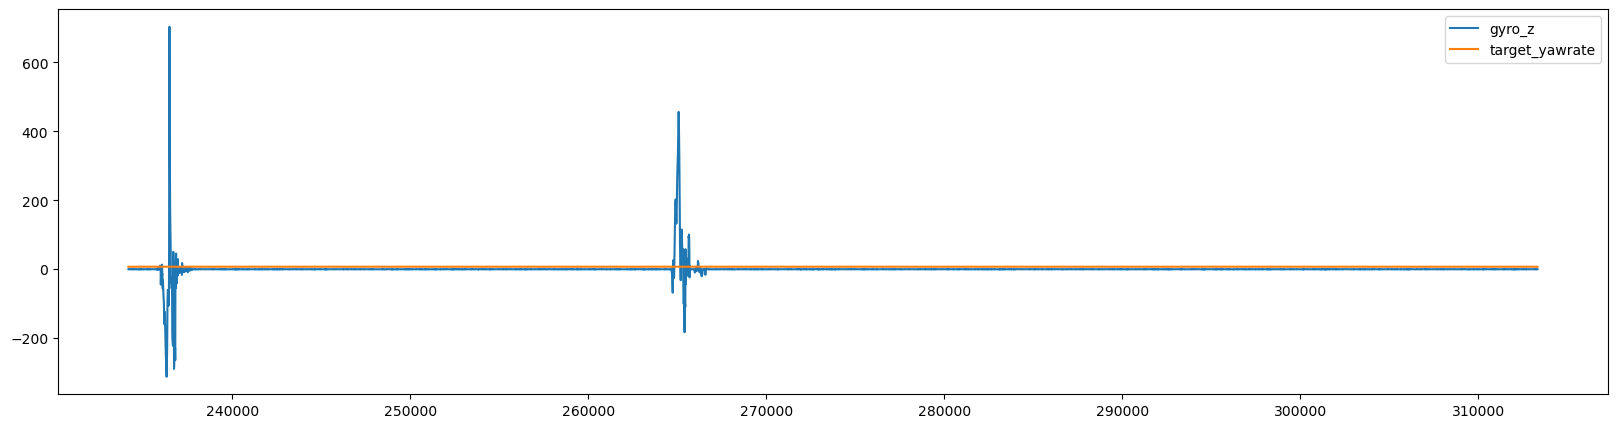

In [3]:
folder = "/home/pcy/Research/code/crazyswarm2-adaptive/cflog/"
print(os.listdir(folder))
file = f"{folder}2023-11-15_13-22-03_log23"

data_usd = cfusdlog.decode(file)
print(data_usd.keys())
fixed_freq = data_usd['fixedFrequency']
print(fixed_freq.keys())

# for k, v in fixed_freq.items():
#     fixed_freq[k] = np.array(v)[1000:1500]

t = fixed_freq['timestamp']
gyro_x = fixed_freq['gyro.x']
gyro_y = fixed_freq['gyro.y']
gyro_z = fixed_freq['gyro.z']
target_rollrate = fixed_freq['controller.roll']
target_pitchrate = fixed_freq['controller.pitch']
target_yawrate = fixed_freq['controller.yaw']

# ctrlRwik.angVel_x, ctrlRwik.angVel_y, ctrlRwik.angVel_z
# angVel_x = fixed_freq['ctrlRwik.angVel_x']
# angVel_y = fixed_freq['ctrlRwik.angVel_y']
# angVel_z = fixed_freq['ctrlRwik.angVel_z']


plt.figure(figsize=(20, 5))
plt.plot(t, gyro_x, label='gyro_x')
plt.plot(t, target_rollrate, label='target_rollrate')
print(target_rollrate)
# plt.ylim([-100, 100])
plt.legend()
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(t, gyro_y, label='gyro_y')
plt.plot(t, target_pitchrate, label='target_pitchrate')
# plt.ylim([-100, 100])
plt.legend()
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(t, gyro_z, label='gyro_z')
plt.plot(t, target_yawrate, label='target_yawrate')
# plt.ylim([-100, 100])
plt.legend()




# # plot 'ctrlAtt.omegaErr_x', 'ctrlAtt.omegaErr_y', 'ctrlAtt.omegaErr_z', 'ctrlAtt.omegaDot_x', 'ctrlAtt.omegaDot_y', 'ctrlAtt.omegaDot_z', 'ctrlAtt.last_err_x', 'ctrlAtt.last_err_y', 'ctrlAtt.last_err_z'
# omega_err_x = fixed_freq['ctrlrate.omegaErr_x']  
# omega_err_y = fixed_freq['ctrlrate.omegaErr_y']
# omega_err_z = fixed_freq['ctrlrate.omegaErr_z']
# omega_dot_x = fixed_freq['ctrlrate.omegaDot_x']
# omega_dot_y = fixed_freq['ctrlrate.omegaDot_y']
# omega_dot_z = fixed_freq['ctrlrate.omegaDot_z']
# last_err_x = fixed_freq['ctrlrate.last_err_x']
# last_err_y = fixed_freq['ctrlrate.last_err_y']
# last_err_z = fixed_freq['ctrlrate.last_err_z']

# kp_rp_rate=180.0
# ki_rp_rate= 35.0 #45.0 works good for 3 battery
# kp_yaw_rate= 70.0
# ki_yaw_rate= 15.0

# plt.figure(figsize=(10, 5))
# plt.plot(t, omega_err_x*kp_rp_rate, label='omega_err_x')
# plt.plot(t, omega_dot_x, label='omega_dot_x')
# plt.plot(t, last_err_x*ki_rp_rate, label='last_err_x')
# plt.ylim([-200, 200])
# plt.legend()

# plt.figure(figsize=(10, 5))
# plt.plot(t, omega_err_y*kp_rp_rate, label='omega_err_y')
# plt.plot(t, omega_dot_y, label='omega_dot_y')
# plt.plot(t, last_err_y*ki_rp_rate, label='last_err_y')
# plt.ylim([-200, 200])
# plt.legend()

# plt.figure(figsize=(10, 5))
# plt.plot(t, omega_err_z*kp_yaw_rate, label='omega_err_z')
# plt.plot(t, omega_dot_z, label='omega_dot_z')
# plt.plot(t, last_err_z*ki_yaw_rate, label='last_err_z')
# plt.ylim([-200, 200])
# plt.legend()




dict_keys(['pos_err', 'vel_err', 'err_i', 'angle_err', 'err_i_att', 'time', 'pos_cur', 'vel_cur', 'omega_cur', 'ang_cur', 'pos_tar', 'vel_tar', 'omega_tar', 'ang_tar', 'f_d', 'thrust'])
(2100, 3) (2100, 3) (2100, 3) (2100, 3) (2100, 3) (2100,) (2100, 3) (2100, 3) (2100, 3) (2100, 3) (2100, 3) (2100, 3) (2100, 3) (2100, 3)


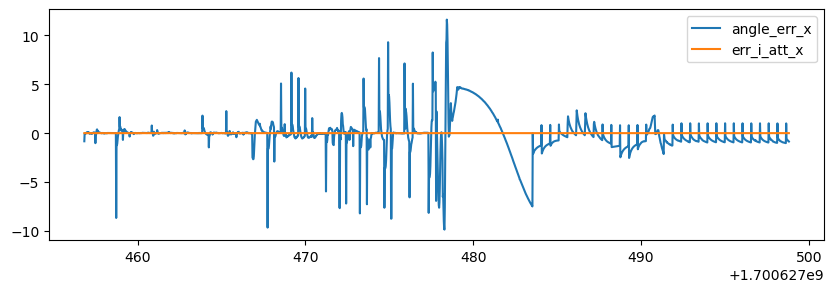

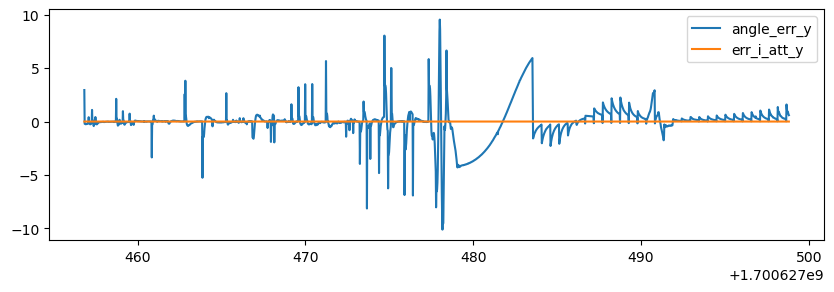

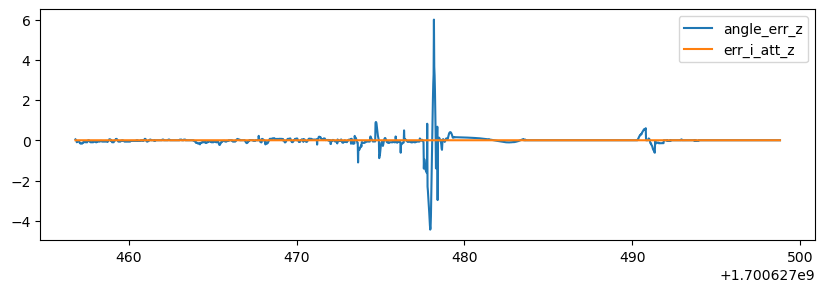

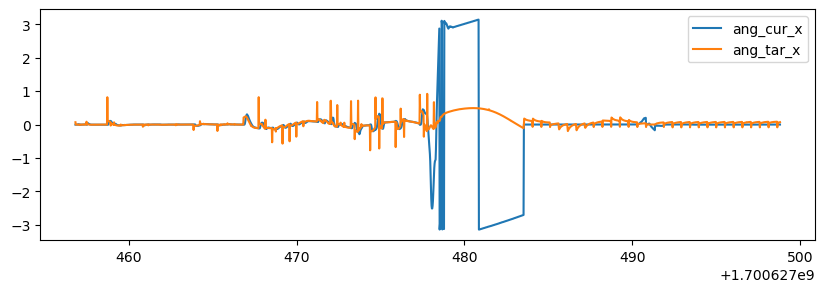

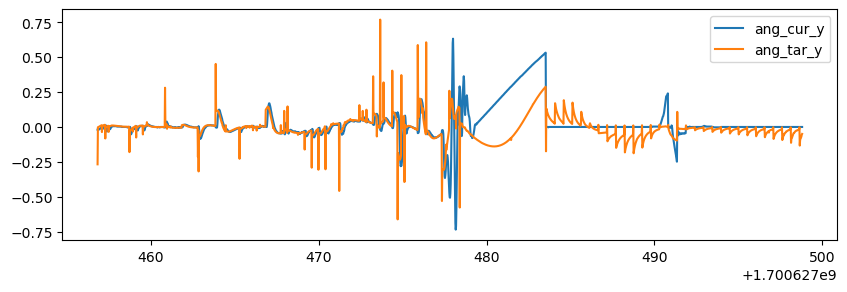

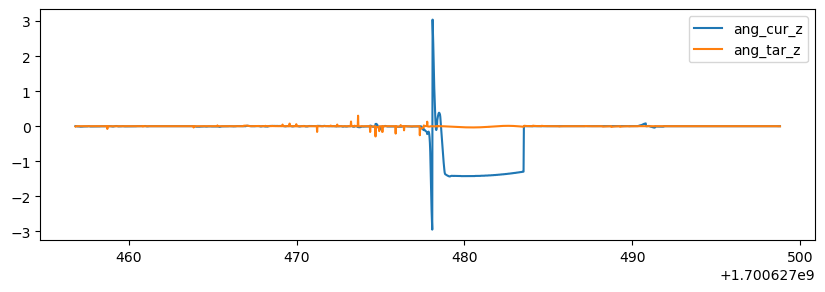

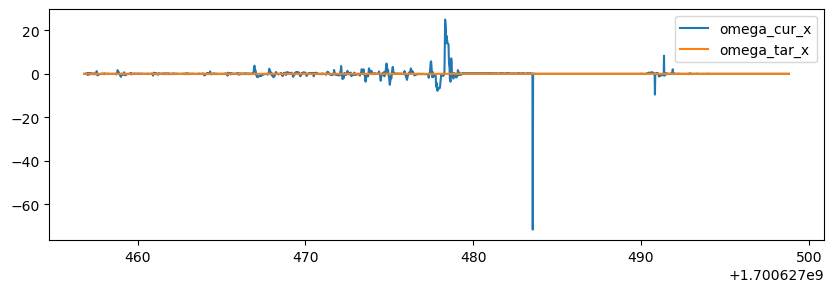

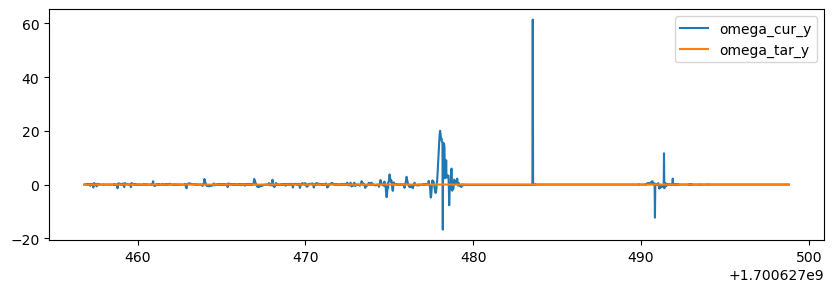

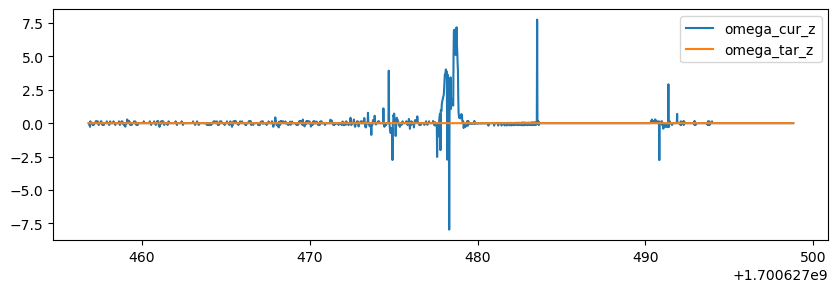

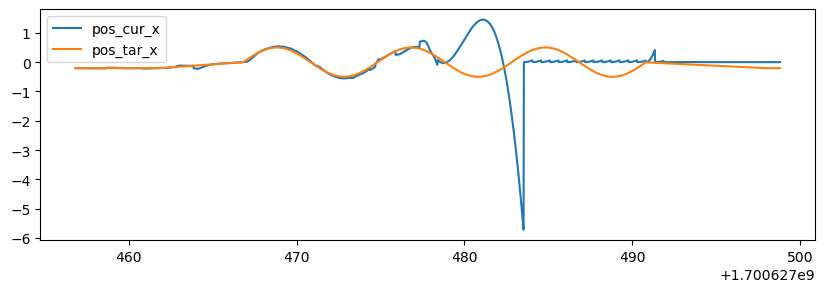

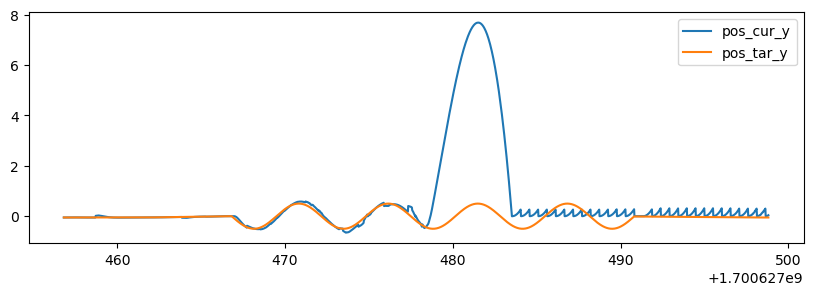

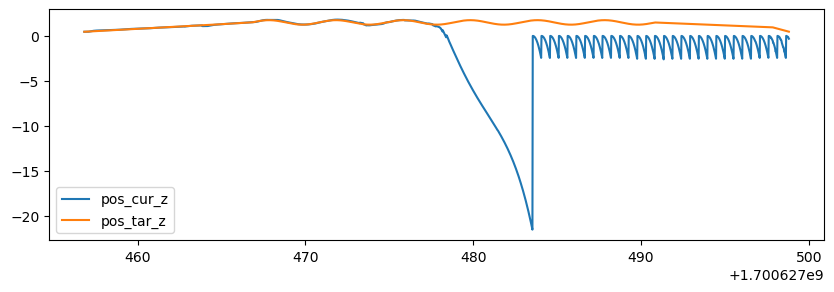

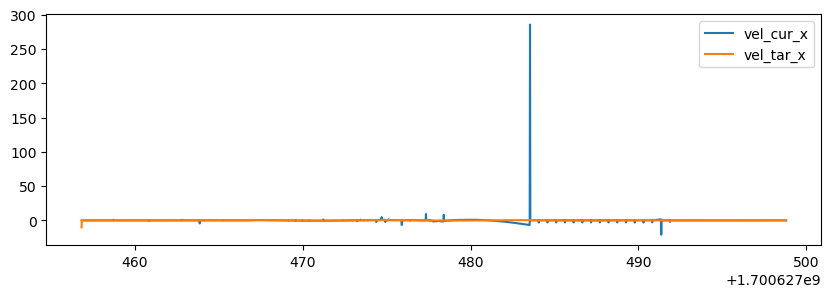

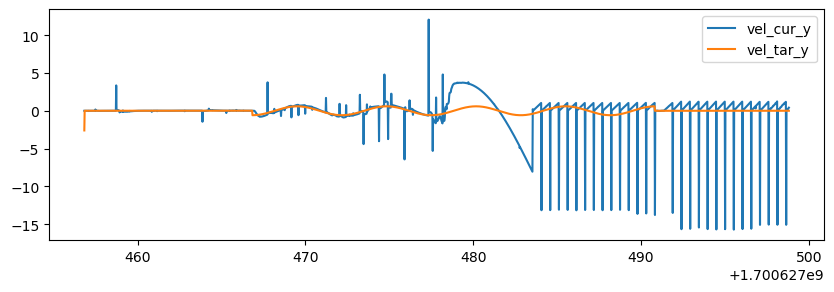

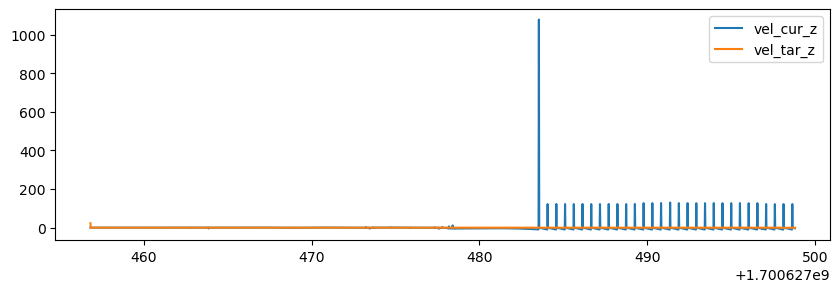

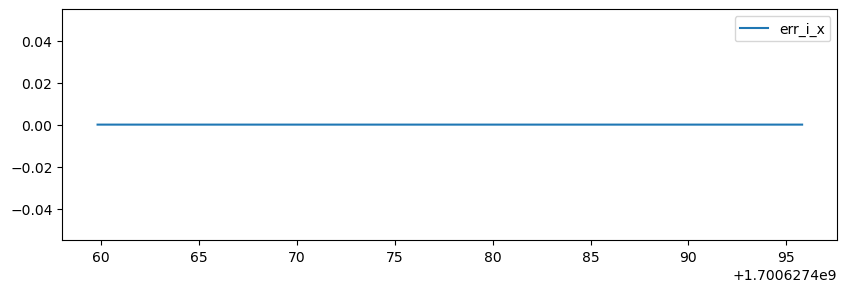

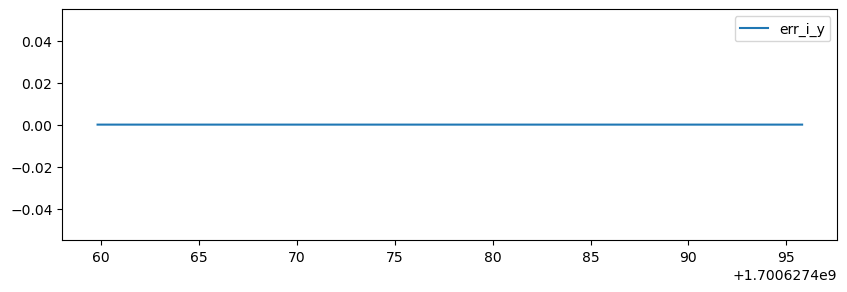

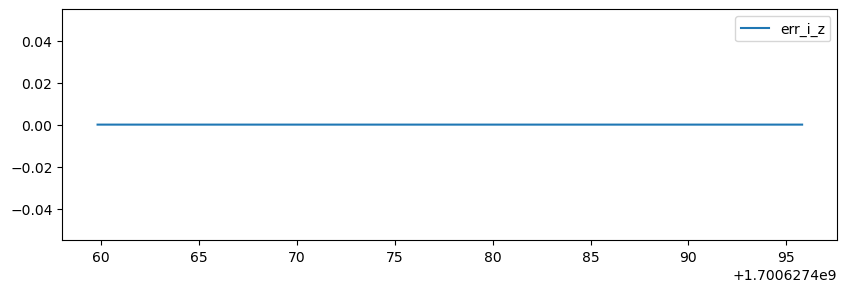

In [5]:
path = "/home/pcy/Research/code/crazyswarm2-adaptive/cflog/att_pid.txt"
import pickle
with open(path, 'rb') as f:
    data = pickle.load(f)
print(data.keys())

#dict_keys(['pos_err', 'vel_err', 'err_i', 'angle_err', 'err_i_att', 'time', 'pos_cur', 'vel_cur', 'omega_cur', 'ang_cur', 'pos_tar', 'vel_tar', 'omega_tar', 'ang_tar'])
pos_err = np.array(data['pos_err'])
vel_err = np.array(data['vel_err'])
err_i = np.array(data['err_i'])
angle_err = np.array(data['angle_err'])
err_i_att = np.array(data['err_i_att'])
time = np.array(data['time'])
pos_cur = np.array(data['pos_cur'])
vel_cur = np.array(data['vel_cur'])
omega_cur = np.array(data['omega_cur'])
ang_cur = np.array(data['ang_cur'])
pos_tar = np.array(data['pos_tar'])

vel_tar = np.array(data['vel_tar'])
omega_tar = np.array(data['omega_tar'])
ang_tar = np.array(data['ang_tar'])

f_d = np.array(data['f_d'])
thrust = np.array(data['thrust'])


print(pos_err.shape, vel_err.shape, err_i.shape, angle_err.shape, err_i_att.shape, time.shape, pos_cur.shape, vel_cur.shape, omega_cur.shape, ang_cur.shape, pos_tar.shape, vel_tar.shape, omega_tar.shape, ang_tar.shape)


plotxyz(time, [angle_err, err_i_att], ['angle_err', 'err_i_att'])
plotxyz(time, [ang_cur, ang_tar], ['ang_cur', 'ang_tar'])
plotxyz(time, [omega_cur, omega_tar], ['omega_cur', 'omega_tar'])

plotxyz(time, [pos_cur, pos_tar], ['pos_cur', 'pos_tar'])
plotxyz(time, [vel_cur, vel_tar], ['vel_cur', 'vel_tar'])
plotxyz(time[150:-150], [err_i[150:-150]], ['err_i'])

# plt.figure(figsize=(10, 3))
# plt.plot(time, f_d, label='f_d')
# plt.plot(time, thrust, label='thrust')
# plt.legend()



In [ ]:
import cfusdlog
import matplotlib.pyplot as plt
import argparse
import numpy as np
import os

path = "/home/pcy/Research/code/crazyswarm2-adaptive/cflog/cfctl_1117170325.txt"
import pickle
with open(path, 'rb') as f:
    data = pickle.load(f)
print(data[0].keys(), len(data))

#list-dict to dict-list
# data_dict = {key: np.array([data[i][key] for i in range(len(data))]) for key in data[0].keys()}
data_dict = {}
for key in data[0].keys():
    for i in range(len(data)):
        if key not in data_dict:
            data_dict[key] = []
        try:
            data_dict[key].append(data[i][key])
        except:
            print(key, i)
            data_dict[key].append(np.zeros_like(data_dict[key][-1])+ np.nan)

# data_dict['time'] = np.linspace(0, len(data)/50.0, len(data))

#dict_keys(['ang_cur', 'ang_tar', 'angle_err', 'err_i', 'err_i_att', 'f_d', 'omega_cur', 'omega_tar', 'pos_cur', 'pos_err', 'pos_tar', 'thrust', 'time', 'vel_cur', 'vel_err', 'vel_tar'])
#plot

pos_err = np.array(data_dict['pos_err'])
vel_err = np.array(data_dict['vel_err'])
err_i = np.array(data_dict['err_i'])
angle_err = np.array(data_dict['angle_err'])
err_i_att = np.array(data_dict['err_i_att'])
# time = np.array(data_dict['time'])
time = np.linspace(0, len(data)/50.0, len(data))
# time = np.array(data_dict['sys_time'])
pos_cur = np.array(data_dict['pos_cur'])
vel_cur = np.array(data_dict['vel_cur'])
omega_cur = np.array(data_dict['omega_cur'])
ang_cur = np.array(data_dict['ang_cur'])
pos_tar = np.array(data_dict['pos_tar'])
ang_tar = np.array(data_dict['ang_tar'])
vel_tar = np.array(data_dict['vel_tar'])
omega_tar = np.array(data_dict['omega_tar'])
f_d = np.array(data_dict['f_d'])
thrust = np.array(data_dict['thrust'])

pos_kf = np.array(data_dict['pos_kf'])
quat_kf = np.array(data_dict['quat_kf'])

print(pos_cur[0])

plotxyz(time, [angle_err, err_i_att], ['angle_err', 'err_i_att'], [-0.1, 0.1])
plotxyz(time, [ang_cur, ang_tar], ['ang_cur', 'ang_tar'])
plotxyz(time, [omega_cur, omega_tar], ['omega_cur', 'omega_tar'])

plotxyz(time, [pos_cur, pos_tar], ['pos_cur', 'pos_tar'])
plotxyz(time, [vel_cur, vel_tar], ['vel_cur', 'vel_tar']) #, [-1.0, 1.0])
plotxyz(time, [pos_err, vel_err, err_i], ['pos_err', 'vel_err', 'err_i'], [-10.0, 10.0])

# plotxyz(time, [pos_kf], ['pos_kf'])

plt.figure(figsize=(10, 3))
plt.plot(time, f_d, label='f_d')
plt.plot(time, thrust, label='thrust')
plt.legend()

In [ ]:
plt.plot(time, data_dict['sys_time'])

In [ ]:
data_dict['time'][0]

In [ ]:
import cfusdlog
import matplotlib.pyplot as plt
import argparse
import numpy as np
import os

# extract data, segment and make dataset
folder = "/home/pcy/Research/code/crazyswarm2-adaptive/cflog/"
print(os.listdir(folder))
file = f"{folder}2023-11-15_13-43-18_log02"

data_usd = cfusdlog.decode(file)
print(data_usd.keys())
fixed_freq = data_usd['fixedFrequency']
print(fixed_freq.keys())

# for k, v in fixed_freq.items():
#     fixed_freq[k] = np.array(v)[1000:1500]

t = fixed_freq['timestamp']/1000
gyro_x = deg2rad(fixed_freq['gyro.x'])
gyro_y = deg2rad(fixed_freq['gyro.y'])
gyro_z = deg2rad(fixed_freq['gyro.z'])
target_rollrate = deg2rad(fixed_freq['ctrltarget.rollRate'])
target_pitchrate = deg2rad(fixed_freq['ctrltarget.pitchRate'])
target_yawrate = deg2rad(fixed_freq['ctrltarget.yawRate'])
x = fixed_freq['stateEstimate.x']
y = fixed_freq['stateEstimate.y']
z = fixed_freq['stateEstimate.z']


# ctrlRwik.angVel_x, ctrlRwik.angVel_y, ctrlRwik.angVel_z
# angVel_x = fixed_freq['ctrlRwik.angVel_x']
# angVel_y = fixed_freq['ctrlRwik.angVel_y']
# angVel_z = fixed_freq['ctrlRwik.angVel_z']


plt.figure(figsize=(20, 5))
plt.plot(t, gyro_x, label='gyro_x')
plt.plot(t, target_rollrate, label='target_rollrate')
print(target_rollrate)1119133535

plt.figure(figsize=(20, 5))
plt.plot(t, gyro_y, label='gyro_y')
plt.plot(t, target_pitchrate, label='target_pitchrate')
# plt.ylim([-100, 100])
plt.legend()
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(t, gyro_z, label='gyro_z')
plt.plot(t, target_yawrate, label='target_yawrate')
# plt.ylim([-100, 100])s
plt.legend()

plotxyz(t, [np.array([x, y, z]).T], ['xyz'])



T = [525, 547]
index = np.where((t > T[0]) & (t < T[1]))[0]
field = ['t', 'p', 'omega', 'omega_tar']
data = np.vstack([t, x, y, z, gyro_x, gyro_y, gyro_z, target_rollrate, target_pitchrate, target_yawrate])
data = data[:, index]

dataset = {'field': field, 'data': data, 'unit': 'Si'}

sysid_folder = "/home/pcy/Research/code/crazyswarm2-adaptive/utils/sysid"

import pickle
with open(f"{sysid_folder}/omega_{file.split('/')[-1]}.pkl", 'wb') as f:
    pickle.dump(dataset, f)









No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


dict_keys(['pos', 'vel', 'quat', 'omega', 'action_pid', 'action_mppi', 'pos_tar', 'vel_tar', 'action_applied']) 344
mean: 0.462, std: 0.430


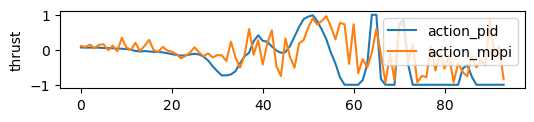

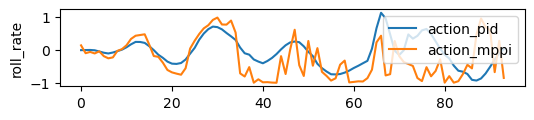

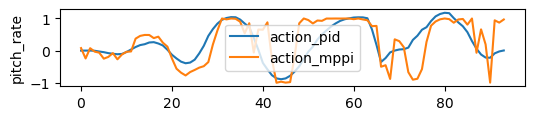

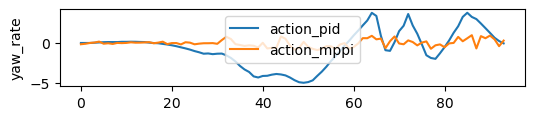

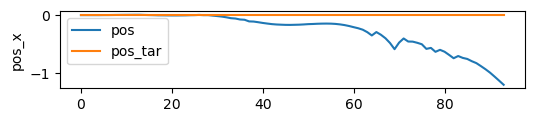

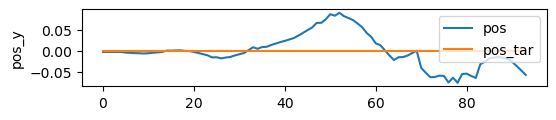

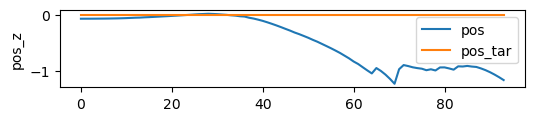

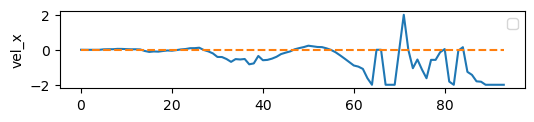

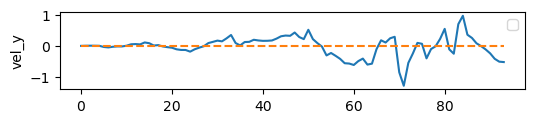

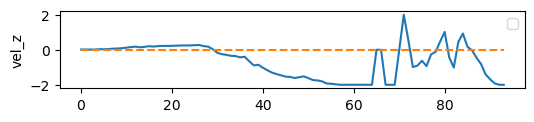

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import rowan

path = "/home/pcy/Research/code/crazyswarm2-adaptive/cflog/cfctl.txt"
# path = "/home/pcy/Research/code/crazyswarm2-adaptive/utils/scripts/mppi_02.txt"
import pickle
with open(path, 'rb') as f:
    data = pickle.load(f)
print(data[0].keys(), len(data))

#list-dict to dict-list
# data_dict = {key: np.array([data[i][key] for i in range(len(data))]) for key in data[0].keys()}
data_dict = {}
for key in data[0].keys():
    for i in range(len(data)):
        if key not in data_dict:
            data_dict[key] = []
        try:
            data_dict[key].append(data[i][key])
        except:
            print(key, i)
            data_dict[key].append(np.zeros_like(data_dict[key][-1])+ np.nan)

action_pid = np.array(data_dict['action_pid'])
action_mppi = np.array(data_dict['action_mppi'])
action_applied = np.array(data_dict['action_applied'])
pos = np.array(data_dict['pos'])
pos_tar = np.array(data_dict['pos_tar'])
quat = np.array(data_dict['quat'])
# convert quat (x y z w) to rpy (roll pitch yaw)
rpy = np.zeros((len(quat), 3))
for i in range(len(quat)):
    rpy[i] = rowan.to_euler(quat[i], 'xyz')
vel = np.array(data_dict['vel'])
vel_tar = np.array(data_dict['vel_tar'])
omega = np.array(data_dict['omega'])

# plot action
# for i, d in enumerate([pos, quat, vel, omega]):
#     plt.figure(figsize=(6, 1))
#     plt.plot(d, label=['pos', 'quat', 'vel', 'omega'][i])
#     plt.legend()
start_step = 5*50
end_step = int((5+22.5)*50)
for i in range(4):
    plt.figure(figsize=(6, 1))
    plt.plot(action_pid[start_step:end_step, i], label='action_pid')
    plt.plot(action_mppi[start_step:end_step, i], label='action_mppi')
    plt.ylabel(['thrust', 'roll_rate', 'pitch_rate', 'yaw_rate'][i])
    # plt.plot(action_applied[:, i], label='action_applied')
    plt.legend()
for i in range(3):
    plt.figure(figsize=(6, 1))
    plt.plot(pos[start_step:end_step, i], label='pos')
    plt.plot(pos_tar[start_step:end_step, i], label='pos_tar')
    plt.ylabel(['pos_x', 'pos_y', 'pos_z'][i])
    # plt.ylim([-1, 1])
    plt.legend()
for i in range(3):
    plt.figure(figsize=(6, 1))
    plt.plot(vel[start_step:end_step, i])
    plt.plot(vel_tar[start_step:end_step, i], '--')
    plt.ylabel(['vel_x', 'vel_y', 'vel_z'][i])
    # plt.ylim([-1, 1])
    plt.legend()

pos_err = (pos - pos_tar)[start_step:end_step, 1:]
err = np.linalg.norm(pos_err, axis=1)
mean, std = np.mean(err), np.std(err)
print(f"mean: {mean:.3f}, std: {std:.3f}")

In [ ]:
action_mppi[:, 0]/action_pid[:, 0]

In [1]:
import pickle
import numpy as np

pos_errs = []
start_step = 5*50
end_step = (5+18)*50
for i in range(3):
    path = f"/home/pcy/Research/code/crazyswarm2-adaptive/utils/scripts/covo-online-{i+1}.txt"
    with open(path, 'rb') as f:
        data = pickle.load(f)
    pos = np.array([d['pos'] for d in data])[start_step:end_step, 1:]
    pos_tar = np.array([d['pos_tar'] for d in data])[start_step:end_step, 1:]
    pos_errs.append(np.linalg.norm(pos - pos_tar, axis=1))
pos_errs = np.concatenate(pos_errs, axis=0)*100
mean, std = np.mean(pos_errs), np.std(pos_errs)
print(f"mean: {mean:.2f}, std: {std:.2f}")

mean: 8.36, std: 4.86


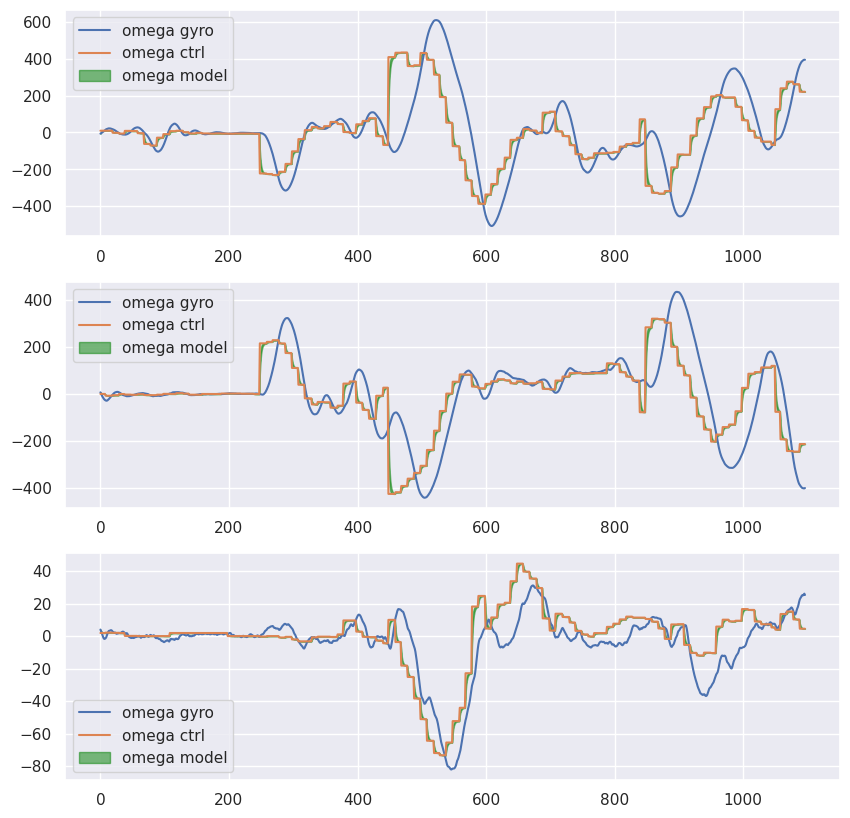

In [4]:
import cfusdlog
import matplotlib.pyplot as plt
import argparse
import numpy as np
import os
import seaborn as sns

# load data
data = cfusdlog.decode('/media/pcy/cfSD/log08')['fixedFrequency']
# set seaborn style
sns.set()
# prepare data
start_step = 0#650
end_step = -1#900
# acc_estimated = np.stack((data['stateEstimate.ax'], data['stateEstimate.ay'], data['stateEstimate.az']), axis=1)
# acc_estimated = (acc_estimated + np.array([0.0, 0.0, 1.0])) * 9.81
# acc_desired = np.stack((data['ctrltarget.ax'], data['ctrltarget.ay'], data['ctrltarget.az']), axis=1)
# acc_estimated = acc_estimated[start_step:end_step, :]
# acc_desired = acc_desired[start_step:end_step, :]
# vel_desired = np.stack(data['ctrltarget.vx'], data['ctrltarget.vy'], data['ctrltarget.vz'], axis=1)
w_gyro = np.stack((data['gyro.x'], data['gyro.y'], data['gyro.z']), axis=1)
w_ctrl = np.stack((data['ctrltarget.rollRate'], data['ctrltarget.pitchRate'], data['ctrltarget.yawRate']), axis=1)
w_in = np.stack((data['controller.rollRate'], data['controller.pitchRate'], data['controller.yawRate']), axis=1)
# calculate omega with first order delay model
w_model_low = np.zeros_like(w_gyro)
w_model_high = np.zeros_like(w_gyro)
w_model_low[0] = w_gyro[0]
w_model_high[0] = w_gyro[0]
for i in range(1, len(w_gyro)):
    w_model_low[i] = w_model_low[i-1] + 0.4 * (w_ctrl[i] - w_model_low[i-1])
    w_model_high[i] = w_model_high[i-1] + 0.6 * (w_ctrl[i] - w_model_high[i-1])

# time = (data['timestamp'] - data['timestamp'][0])
time = np.arange(0, len(w_gyro))
# plot
# time = (data['timestamp'] - data['timestamp'][0])/100
# plot pos_estimated and pos_desired
fig = plt.figure(figsize=(10, 10))
for i in range(3):
    plt.subplot(3, 1, i+1)
    # plt.plot(acc_estimated[:, i], label='acc_estimated')
    # plt.plot(acc_desired[:, i], label='acc_desired')
    plt.plot(time[start_step:end_step], w_gyro[start_step:end_step, i], label='omega gyro')
    plt.plot(time[start_step:end_step], w_ctrl[start_step:end_step, i], label='omega ctrl')
    # fill between w_model_low and w_model_high
    plt.fill_between(time[start_step:end_step], w_model_low[start_step:end_step, i], w_model_high[start_step:end_step, i], alpha=0.5, label='omega model', color='green')
    plt.legend()

import scipy.io
ts = np.arange(0, len(w_gyro))/50.0
us = w_ctrl[:,0] * np.pi / 180 
xs_true = w_gyro[:,0] * np.pi / 180
# scipy.io.savemat('data_x.mat', dict(ts_x=ts, us_x=us, xs_true_x=xs_true))
# scipy.io.savemat('data_y.mat', dict(ts_y=ts, us_y=us, xs_true_y=xs_true))
scipy.io.savemat('data_xy.mat', dict(ts_xy=ts, us_xy=us, xs_true_xy=xs_true))

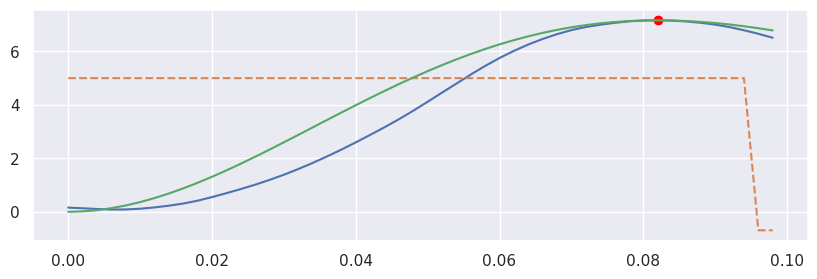

In [3]:
x = w_gyro[50:100, 0] / 180 * np.pi
x_des = w_ctrl[50:100, 0] / 180 * np.pi
dt = 1/500
t = np.arange(0, len(x))*dt
plt.figure(figsize=(10, 3))
plt.plot(t, x)
plt.plot(t, x_des, '--')

# get peak time
t_peak_idx = np.argmax(x)
t_peak = t[t_peak_idx]
# get peak value
x_peak = x[t_peak_idx]
# label peak time
plt.scatter(t_peak, x_peak, color='red', label=f'peak time: {t_peak:.3f}')

# estimate damping ratio zeta from step response
po = (x_peak - x_des[1]) / x_des[1]
zeta = -np.log(po) / np.sqrt(np.pi**2 + np.log(po)**2)
# estimate natural frequency omega_n from step response
omega_n = np.pi / (t_peak * np.sqrt(1 - zeta**2))

# plot step response
x_fit = x_des[1] * (1 - np.exp(-zeta * omega_n * t) * (np.cos(omega_n * np.sqrt(1 - zeta**2) * t) + zeta / np.sqrt(1 - zeta**2) * np.sin(omega_n * np.sqrt(1 - zeta**2) * t)))
plt.plot(t, x_fit, label=f'zeta: {zeta:.3f}, omega_n: {omega_n:.3f}')

In [16]:
zeta_origin = zeta
omega_n_origin = omega_n

In [114]:
omega_n_origin * zeta_origin

10.213653791743742

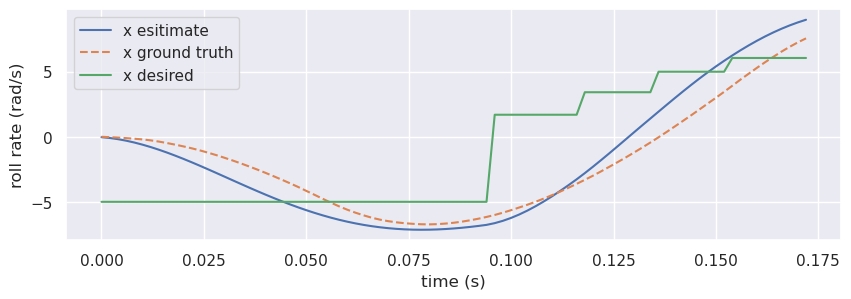

In [17]:
# calculate the x response according to the input u

dt = 1/500
x = 0.0
x_dot = 0.0
test_start_idx = 50
test_end_idx = -1
us = w_ctrl[test_start_idx:test_end_idx, 0] / 180 * np.pi
xs_true = w_gyro[test_start_idx:test_end_idx, 0] / 180 * np.pi
ts = np.arange(0, len(us))*dt
xs = []
alpha = 1.0
zeta = zeta_origin
omega_n = omega_n_origin
last_x_ddot = 0.0
for i in range(len(us)):
    x_ddot = - 2 * zeta * omega_n * x_dot - omega_n**2 * x + omega_n**2 * us[i]
    x_ddot = (1 - alpha) * last_x_ddot + alpha * x_ddot
    last_x_ddot = x_ddot
    x_dot += x_ddot * dt
    x += x_dot * dt
    xs.append(x)
plt.figure(figsize=(10, 3))
plt.plot(ts, xs, label='x esitimate')
plt.plot(ts, xs_true, '--', label='x ground truth')
plt.plot(ts, us, label='x desired')
plt.xlabel('time (s)')
plt.ylabel('roll rate (rad/s)')
plt.legend()

# save us, ts, xs_true as matlab file
import scipy.io
# scipy.io.savemat('roll_rate_test3.mat', {'ts': ts, 'us': us, 'xs_true': xs_true})
scipy.io.savemat('roll_rate_test2.mat', {'ts2': ts, 'us2': us, 'xs_true2': xs_true})

#save as matlab

In [85]:
omega_n * zeta

10.213653791743742

In [ ]:
y = acc_estimated[1:, 2]
x = acc_desired[:-1, 2]

# do linear regression with numpy 
# (y = ax + b)
a, b = np.polyfit(x, y, 1)
# plot
plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.plot(x, a*x+b, color='red')
# show a, b in title
plt.title(f'a={a:.3f}, b={b:.3f}')

In [ ]:
import pickle
import seaborn as sns
import numpy as np

with open('/home/pcy/Research/code/crazyswarm2-adaptive/src/crazyswarm2/crazyflie_examples/crazyflie_examples/results/covo_cov.pkl', 'rb') as f:
    data = pickle.load(f)

m1 = data[0]
m1 = m1 / np.max(np.abs(m1))
# m2 = data[499]
# m2 = m2 / np.max(np.abs(m2))

# use seaborn to plot m1 and m2 as heatmap, with value > 0 in red, < 0 in blue
sns.heatmap(m1, cmap='RdBu', vmin=-1, vmax=1)
# sns.heatmap(m2[:50, :50], cmap='RdBu', vmin=-1, vmax=1)

In [ ]:
data[0,0,0]